In [ ]:
pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd

# Jika mengunggah banyak file
filenames = ['Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv','Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
             'Friday-WorkingHours-Morning.pcap_ISCX.csv']
dfs = [pd.read_csv(file) for file in filenames]

# Menggabungkan beberapa file jadi satu DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
print(combined_df.head())

                                  Flow ID      Source IP   Source Port  \
0  192.168.10.12-192.168.10.50-35396-22-6  192.168.10.12         35396   
1  192.168.10.16-192.168.10.50-60058-22-6  192.168.10.16         60058   
2  192.168.10.12-192.168.10.50-35396-22-6  192.168.10.12         35396   
3  192.168.10.12-192.168.10.50-35398-22-6  192.168.10.12         35398   
4  192.168.10.12-192.168.10.50-35396-22-6  192.168.10.50            22   

   Destination IP   Destination Port   Protocol      Timestamp  \
0   192.168.10.50                 22          6  7/7/2017 1:00   
1   192.168.10.50                 22          6  7/7/2017 1:00   
2   192.168.10.50                 22          6  7/7/2017 1:00   
3   192.168.10.50                 22          6  7/7/2017 1:00   
4   192.168.10.12              35396          6  7/7/2017 1:00   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0         1266342                  41                       44  ...   
1         131935

In [ ]:
# Menampilkan ringkasan informasi DataFrame
print(combined_df.info())

# Menampilkan ringkasan statistik deskriptif
print(combined_df.describe())

# Mengecek apakah ada missing values (nilai kosong)
print(combined_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703245 entries, 0 to 703244
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       703245 non-null  object 
 1    Source IP                    703245 non-null  object 
 2    Source Port                  703245 non-null  int64  
 3    Destination IP               703245 non-null  object 
 4    Destination Port             703245 non-null  int64  
 5    Protocol                     703245 non-null  int64  
 6    Timestamp                    703245 non-null  object 
 7    Flow Duration                703245 non-null  int64  
 8    Total Fwd Packets            703245 non-null  int64  
 9    Total Backward Packets       703245 non-null  int64  
 10  Total Length of Fwd Packets   703245 non-null  int64  
 11   Total Length of Bwd Packets  703245 non-null  float64
 12   Fwd Packet Length Max        703245 non-nul

In [ ]:
# Menghapus duplikat jika ada
combined_df = combined_df.drop_duplicates()

# Mengisi atau menghapus missing values
combined_df = combined_df.dropna()

print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 703193 entries, 0 to 703244
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       703193 non-null  object 
 1    Source IP                    703193 non-null  object 
 2    Source Port                  703193 non-null  int64  
 3    Destination IP               703193 non-null  object 
 4    Destination Port             703193 non-null  int64  
 5    Protocol                     703193 non-null  int64  
 6    Timestamp                    703193 non-null  object 
 7    Flow Duration                703193 non-null  int64  
 8    Total Fwd Packets            703193 non-null  int64  
 9    Total Backward Packets       703193 non-null  int64  
 10  Total Length of Fwd Packets   703193 non-null  int64  
 11   Total Length of Bwd Packets  703193 non-null  float64
 12   Fwd Packet Length Max        703193 non-null  in

In [ ]:
print(combined_df.columns)

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

 Label
BENIGN      414270
PortScan    158930
DDoS        128027
Bot           1966
Name: count, dtype: int64


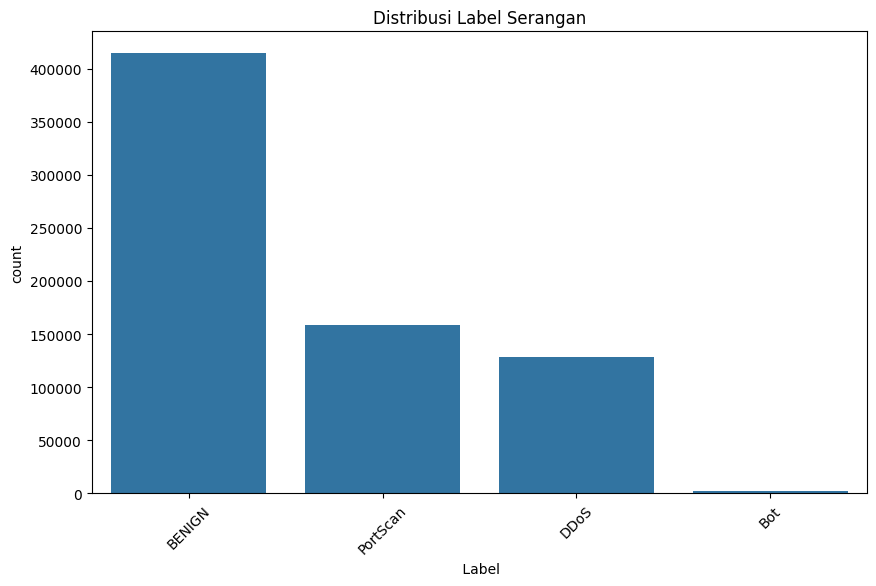

In [ ]:
# Melihat distribusi data berdasarkan label serangan
print(combined_df[' Label'].value_counts())

# Visualisasi distribusi label menggunakan matplotlib atau seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x=' Label')
plt.title("Distribusi Label Serangan")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Mengubah data kategori menjadi numerik (contoh: Label)
combined_df[' Label'] = combined_df[' Label'].astype('category').cat.codes

# Memisahkan fitur (X) dan target (y)
X = combined_df.drop(columns=[' Label'])  # Semua kolom kecuali Label
y = combined_df[' Label']

# Menampilkan contoh X dan y
print(X.head())
print(y.head())


                                  Flow ID      Source IP   Source Port  \
0  192.168.10.12-192.168.10.50-35396-22-6  192.168.10.12         35396   
1  192.168.10.16-192.168.10.50-60058-22-6  192.168.10.16         60058   
2  192.168.10.12-192.168.10.50-35396-22-6  192.168.10.12         35396   
3  192.168.10.12-192.168.10.50-35398-22-6  192.168.10.12         35398   
4  192.168.10.12-192.168.10.50-35396-22-6  192.168.10.50            22   

   Destination IP   Destination Port   Protocol      Timestamp  \
0   192.168.10.50                 22          6  7/7/2017 1:00   
1   192.168.10.50                 22          6  7/7/2017 1:00   
2   192.168.10.50                 22          6  7/7/2017 1:00   
3   192.168.10.50                 22          6  7/7/2017 1:00   
4   192.168.10.12              35396          6  7/7/2017 1:00   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0         1266342                  41                       44  ...   
1         131935

In [ ]:
# Mengecek distribusi nilai pada kolom Label
print(y.value_counts())

# Menampilkan persentase distribusi
print("\nDistribusi persentase:")
print(y.value_counts(normalize=True) * 100)


 Label
0    414270
3    158930
2    128027
1      1966
Name: count, dtype: int64

Distribusi persentase:
 Label
0    58.912702
3    22.601192
2    18.206524
1     0.279582
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}")
print(f"Testing data: {X_test.shape}")

Training data: (562554, 88)
Testing data: (140639, 88)


In [ ]:
import numpy as np

X_train_numeric = X_train.select_dtypes(include=[np.number])

# Memeriksa nilai NaN pada data
print(f"Apakah ada nilai NaN di X_train? {X_train.isnull().any().any()}")

# Memeriksa nilai Inf pada data (hanya kolom numerik)
print(f"Apakah ada nilai Inf di X_train? {np.isinf(X_train_numeric.to_numpy()).any()}")

# Mengganti nilai NaN atau Inf dengan nilai yang sesuai
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)  # Ganti Inf dengan NaN
X_train.fillna(X_train.mean(numeric_only=True), inplace=True)  # Ganti NaN dengan rata-rata kolom numerik


Apakah ada nilai NaN di X_train? False
Apakah ada nilai Inf di X_train? False


In [ ]:
# Pilih hanya kolom numerik
X_train_numeric = X_train.select_dtypes(include=[np.number])

# Ganti nilai Inf dengan NaN
X_train_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)

# Isi nilai NaN dengan rata-rata kolom
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)

X_train.update(X_train_numeric)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import ipaddress

# Pisahkan fitur dan label
X_train = X
y_train = y

# Langkah 1: Memecah IP Address menjadi sub-komponen
X_train[['ip_start', 'ip_end', 'port_start', 'port_end', 'other']] = X_train['Flow ID'].str.split('-', expand=True)

# Langkah 2: Konversi IP ke representasi numerik
def ip_to_int(ip_str):
    try:
        return int(ipaddress.ip_address(ip_str))
    except ValueError:
        return None

X_train['ip_start_int'] = X_train['ip_start'].apply(ip_to_int)
X_train['ip_end_int'] = X_train['ip_end'].apply(ip_to_int)
X_train['port_start'] = pd.to_numeric(X_train['port_start'], errors='coerce')
X_train['port_end'] = pd.to_numeric(X_train['port_end'], errors='coerce')
X_train['other'] = pd.to_numeric(X_train['other'], errors='coerce')

# Drop kolom asli yang sudah dipecah
X_train.drop(columns=['Flow ID', 'ip_start', 'ip_end'], inplace=True)

# Langkah 3: Tangani nilai NaN dan Inf hanya pada kolom numerik
# Pilih hanya kolom numerik
numeric_cols = X_train.select_dtypes(include=[np.number]).columns

# Gantikan nilai NaN atau Inf dengan nilai rata-rata untuk kolom numerik
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].mean())

# Langkah 4: Encoding untuk kolom kategorikal (jika ada)
# Jika ada kolom non-numerik (string), kita bisa menggunakan LabelEncoder
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))

# Langkah 5: Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Output hasil
print("Data setelah di-preprocessing:")
print(X_train.head())
print("\nData setelah SMOTE:")
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Data setelah di-preprocessing:
    Source IP   Source Port   Destination IP   Destination Port   Protocol  \
0        2124         35396             2528                 22          6   
1        2127         60058             2528                 22          6   
2        2124         35396             2528                 22          6   
3        2124         35398             2528                 22          6   
4        2133            22             2518              35396          6   

    Timestamp   Flow Duration   Total Fwd Packets   Total Backward Packets  \
0         180         1266342                  41                       44   
1         180         1319353                  41                       44   
2         180             160                   1                        1   
3         180         1303488                  41                       42   
4         180              77                   1                        2   

   Total Length of Fwd Packets 

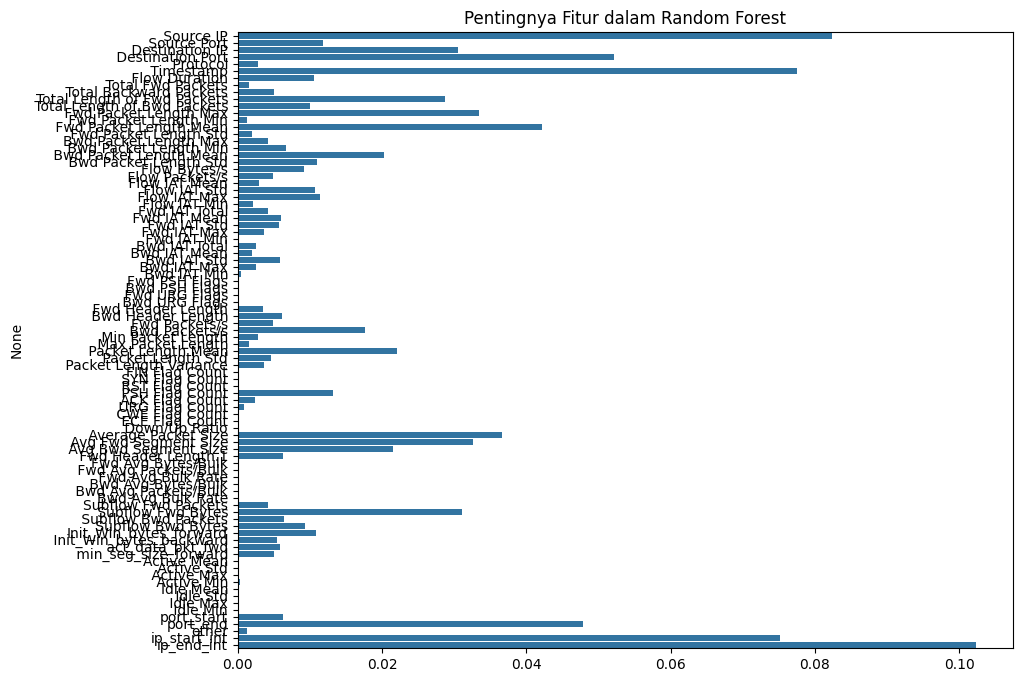

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
model = RandomForestClassifier(random_state=42)

# Melatih model menggunakan data yang telah di-resample
model.fit(X_train_resampled, y_train_resampled)

# Menampilkan fitur penting (opsional)
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=features)
plt.title("Pentingnya Fitur dalam Random Forest")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Akurasi: 0.588193886475302

Laporan Klasifikasi:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74     82723
           1       0.00      0.00      0.00       396
           2       0.00      0.00      0.00     25740
           3       0.00      0.00      0.00     31780

    accuracy                           0.59    140639
   macro avg       0.15      0.25      0.19    140639
weighted avg       0.35      0.59      0.44    140639



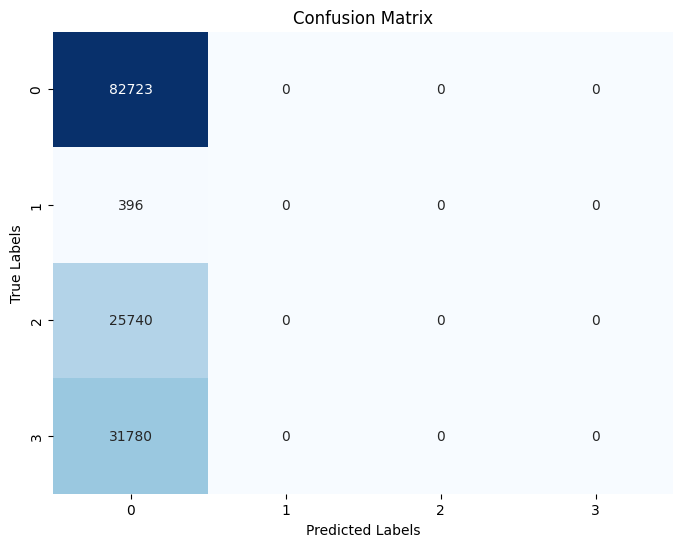

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X_test is a DataFrame (if it is a numpy array)
X_test = pd.DataFrame(X_test)

# Convert all columns to numeric (non-numeric will become NaN)
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Replace infinite values with NaN
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with the column mean (use the same imputer that was used for X_train)
imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)

# Convert X_test back to DataFrame after imputation to keep the column names
X_test = pd.DataFrame(X_test, columns=X_train.columns[:X_test.shape[1]])

# Ensure the number of columns in X_test matches X_train (add missing columns as NaN)
missing_columns = set(X_train.columns) - set(X_test.columns)
for col in missing_columns:
    X_test[col] = np.nan  # Add missing columns with NaN values

# Reorder X_test to match the column order of X_train
X_test = X_test[list(X_train.columns)]

# Scale the data to handle excessively large values
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Retry prediction
try:
    y_pred = model.predict(X_test)
    print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
except ValueError as e:
    print(f"An error occurred: {e}")


In [ ]:
from sklearn.metrics import f1_score

# Menghitung F1-Score
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")


F1-Score: 0.4356798638165526


In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)  # Probabilitas untuk semua kelas

# Untuk multi-class, kita hitung AUC secara One-vs-Rest
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC-AUC: {roc_auc}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ROC-AUC: 0.38973675042824696
